In [1]:
import tensorflow as tf

fancy_mnist = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = fancy_mnist.load_data()
# Antes que nada normalizamos las imágenes
x_train, x_test = x_train/255.0, x_test/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

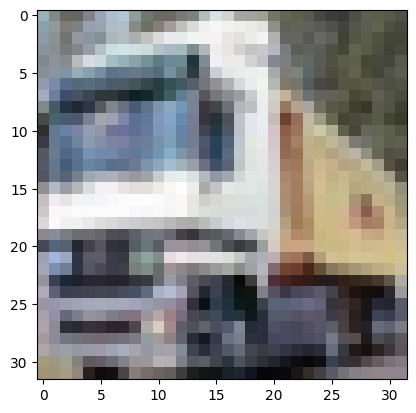

[9]
truck


In [2]:
import matplotlib.pyplot as plt

i = 1
fig, ax = plt.subplots(1)
ax.remove
ax.imshow(x_train[i])
plt.show()
print(y_train[i])
print(class_names[int(y_train[i])])

In [10]:
import numpy as np

In [12]:
# Exploramos los datos:
print(x_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 1)


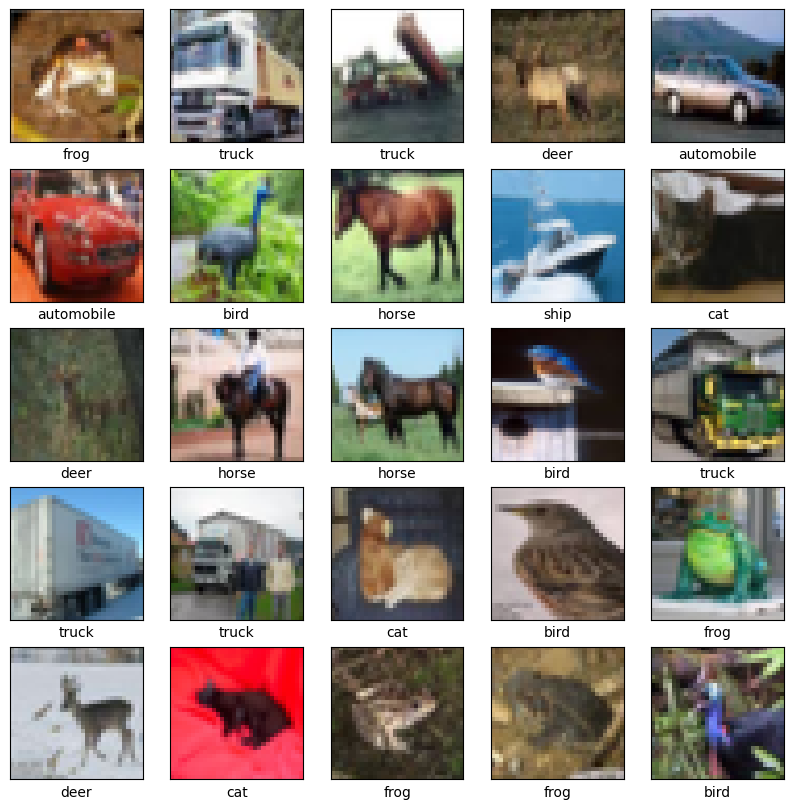

In [50]:
# vamos a mostrar más ejemplos del dataset:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

# Ahora vamos a construir el modelo:


In [29]:
from tensorflow.keras import datasets, layers, models

In [32]:
model = models.Sequential()
# Convolución, se le mete un tensor de (None, 32, 32, 3)
# saca un tensor de (None, 30, 30, 32) por haberle pasado 32 filtros 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Hace un pooling al máximo de los valores, es decir, simplifica
# las imágenes, dando un tensor de (None, 15, 15, 32) 
# partimos la imagen en secciones de 2x2px y elegimos el 
# mayor valor en cada trozo.
model.add(layers.MaxPooling2D((2, 2)))

# repetimos otra convolución
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# repetimos otro max pooling
model.add(layers.MaxPooling2D((2, 2)))
# añadimos una ultima convolución (no se por qué)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# ahora aplanamos el tensor (None, 4, 4, 64) ----> (None, 1024)
model.add(layers.Flatten())
# lo metemos en una red neuronal normal con capas densas.
model.add(layers.Dense(64, activation = 'relu'))
# esta es la capa de salida para 10 categorías
model.add(layers.Dense(10))


In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [56]:
# Entranamos al modelo
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5608 - accuracy: 0.4421 - val_loss: 1.2656 - val_accuracy: 0.5379
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1985 - accuracy: 0.5727 - val_loss: 1.1758 - val_accuracy: 0.5852
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0616 - accuracy: 0.6261 - val_loss: 1.0419 - val_accuracy: 0.6323
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9788 - accuracy: 0.6558 - val_loss: 0.9893 - val_accuracy: 0.6523
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9098 - accuracy: 0.6800 - val_loss: 0.9425 - val_accuracy: 0.6724
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8512 - accuracy: 0.7022 - val_loss: 0.9680 - val_accuracy: 0.6728
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8056 - accuracy: 0.7196 - val_loss: 0.9161 -

KeyboardInterrupt: 

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.9152 - accuracy: 0.6858 - 1s/epoch - 4ms/step


In [58]:
# Hacemos predicciones y mostramos ejemplos:
predicctions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [59]:
import numpy as np

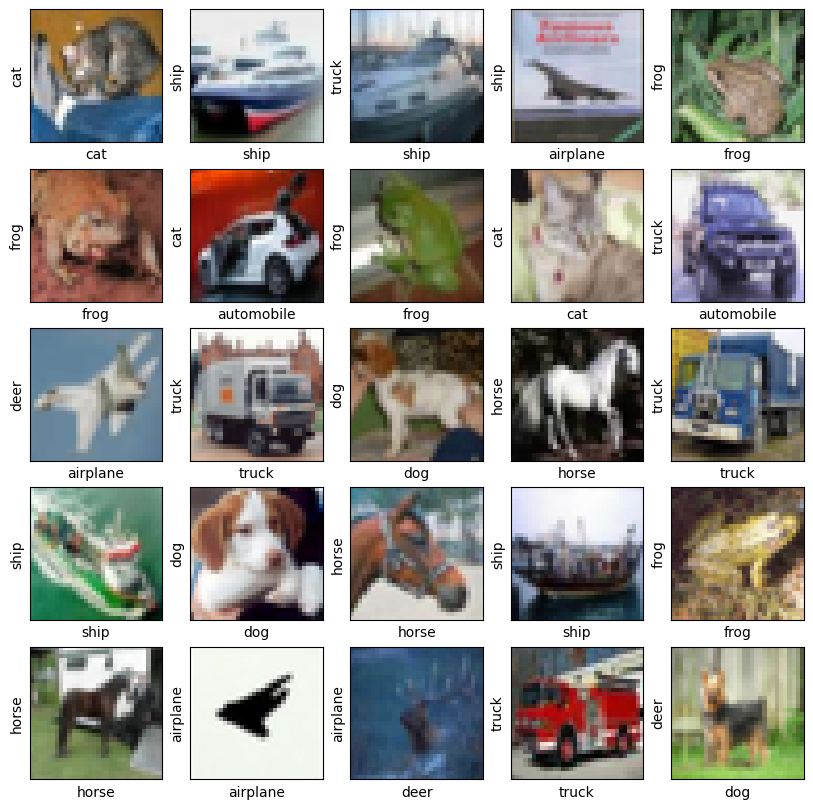

In [60]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel(class_names[int(y_test[i])])
    plt.ylabel(class_names[np.argmax(predicctions[i])])
plt.show()

# servicios en la nube:

# mejorar accuracy:

In [65]:
model2 = models.Sequential()
# Convolución, se le mete un tensor de (None, 32, 32, 3)
# saca un tensor de (None, 30, 30, 32) por haberle pasado 32 filtros 
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Hace un pooling al máximo de los valores, es decir, simplifica
# las imágenes, dando un tensor de (None, 15, 15, 32) 
# partimos la imagen en secciones de 2x2px y elegimos el 
# mayor valor en cada trozo.
model2.add(layers.MaxPooling2D((2, 2)))

# repetimos otra convolución
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
# repetimos otro max pooling
model2.add(layers.MaxPooling2D((2, 2)))
# añadimos una ultima convolución (no se por qué)
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))


# Añadimos un dropout que apague un cuarto de las neuronas
model2.add(layers.Dropout(0.25))

# ahora aplanamos el tensor (None, 4, 4, 64) ----> (None, 1024)
model2.add(layers.Flatten())
# lo metemos en una red neuronal normal con capas densas.
model2.add(layers.Dense(64, activation = 'relu'))
# esta es la capa de salida para 10 categorías
model2.add(layers.Dense(10))

# Añadimos un dropout que apague un cuarto de las neuronas
model2.add(layers.Dropout(0.25))

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [67]:
# Entranamos al modelo
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5316 - accuracy: 0.4382 - val_loss: 1.2614 - val_accuracy: 0.5526
Epoch 2/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.1633 - accuracy: 0.5875 - val_loss: 1.0912 - val_accuracy: 0.6137
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0079 - accuracy: 0.6436 - val_loss: 1.0489 - val_accuracy: 0.6320
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9028 - accuracy: 0.6841 - val_loss: 0.9329 - val_accuracy: 0.6775
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8281 - accuracy: 0.7098 - val_loss: 0.9058 - val_accuracy: 0.6798
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7635 - accuracy: 0.7340 - val_loss: 0.9368 - val_accuracy: 0.6828
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7177 - accuracy: 0.7494 - val_loss: 0.9068 -

In [68]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.9283 - accuracy: 0.7000 - 1s/epoch - 4ms/step


In [72]:
# Hacemos predicciones y mostramos ejemplos:
predicctions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [73]:
import numpy as np

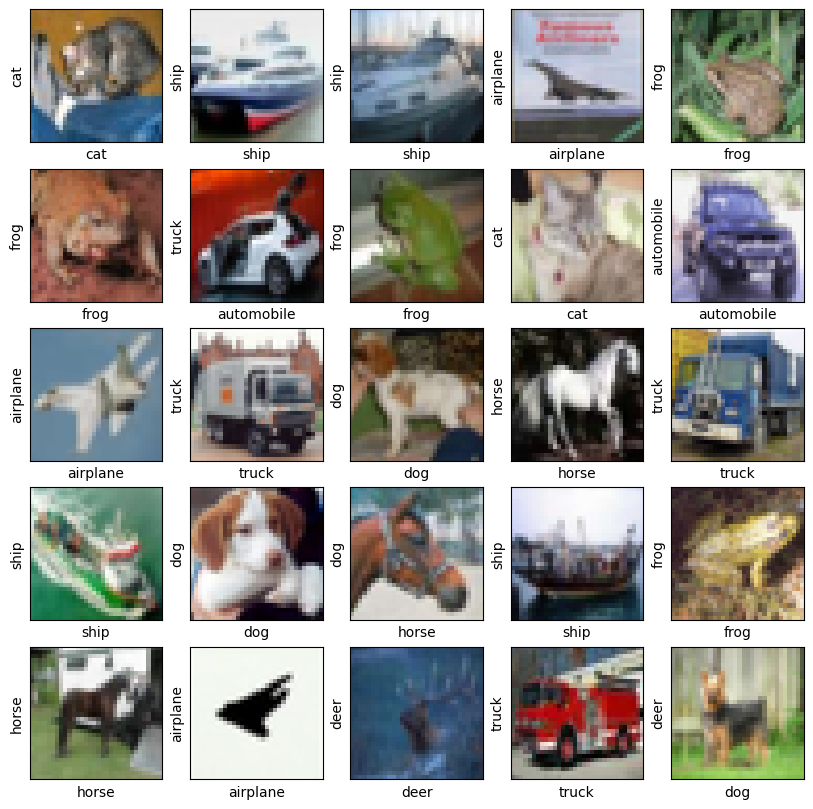

In [74]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel(class_names[int(y_test[i])])
    plt.ylabel(class_names[np.argmax(predicctions[i])])
plt.show()